In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

8.1 The Estimation Game
---

In [66]:
sample1 = [-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

What do you think is the mean parameter, µ, of this distribution

one option can be mean parameter for population is sample mean

This process is
called estimation, and the statistic we used (the sample mean) is called an
estimator.

We can also use the median to predict the actual mean.

In [67]:
np.mean(sample1)

0.15516666666666667

In [68]:
# with outliers
sample2 = [-0.441, 1.774, -0.101, -1.138, 2.975, -213.8]
print('Mean: ',np.mean(sample1),'Median: ',np.median(sample1))

Mean:  0.15516666666666667 Median:  -0.271


Which estimator is best depends on the circumstances (for example, whether
there are outliers) and on what the goal is. Are you trying to minimize errors,
or maximize your chance of getting the right answer?

If there are no outliers, the sample mean minimizes the mean squared error
(MSE). That is, if we play the game many times, and each time compute the
error ¯ x − µ, the sample mean minimizes

MSE = 1/m X sum(mean_sample − µ)2

In [69]:
def estimate(given_sample,m):
    mean = np.mean(given_sample)
    std = np.std(given_sample)
    n = len(given_sample)
    
    means = []
    medians = []
    
    for _ in range(m):
        sample = np.random.normal(loc=mean,scale=std,size=n)
        xbar = np.mean(sample)
        median = np.median(sample)
        
        means.append(xbar)
        medians.append(median)
        
    return means,medians

# root mean square error
def RMSE(estimates,actual):
    return (np.mean([(estimate-actual)**2 for estimate in estimates]))**0.5

In [70]:
means,medians = estimate(sample1,1000)
med_rmse = RMSE(medians,np.mean(sample1))
mean_rmse = RMSE(means,np.mean(sample1))

print(mean_rmse,med_rmse)

0.7345244044830945 0.8152686985748441


The purpose of this experiment is to compare the performance
of the two estimators.
In this example, confirms that mean yields lower
RMSE than median, at least for this example.

Minimizing MSE is a nice property, but it’s not always the best strategy.
For example, suppose we are estimating the distribution of wind speeds at a
building site. If the estimate is too high, we might overbuild the structure,
increasing its cost. But if it’s too low, the building might collapse. Because
cost as a function of error is not symmetric, minimizing MSE is not the best
strategy.

As another example, suppose I roll three six-sided dice and ask you to predict
the total. If you get it exactly right, you get a prize; otherwise you get
nothing. In this case the value that minimizes MSE is 10.5, but that would
be a bad guess, because the total of three dice is never 10.5. For this game,
you want an estimator that has the highest chance of being right, which is a
maximum likelihood estimator (MLE). If you pick 10 or 11, your chance
of winning is 1 in 8, and that’s the best you can do

8.2 Guess the variance
---

[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

For large samples, S2 is an adequate estimator, but for small samples it tends
to be too low. Because of this unfortunate property, it is called a biased
estimator. An estimator is unbiased if the expected total (or mean) error,
after many iterations of the estimation game, is 0.

Fortunately, there is another simple statistic that is an unbiased estimator
of σ2: Bessel's correction

function that simulates the estimation game and tests the performance of S2 and S2
n−1

In [71]:
def estimate_std(sample,m):
    mean = np.mean(sample)
    std = np.std(sample,ddof=0)
    n= len(sample)
    
    estimate1 = []
    estimate2 = []
    
    for _ in range(m):
        sample = np.random.normal(loc=mean,scale=std,size=n)
        biased = np.std(sample,ddof=0)
        unbiased = np.std(sample,ddof=1)
        
        estimate1.append(biased)
        estimate2.append(unbiased)
        
    return estimate1,estimate2

def MeanError(estimates,actual):
    return np.mean([(estimate-actual) for estimate in estimates])

In [72]:
sample = [-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]
std_sample = np.std(sample,ddof=0)
biased,unbiased = estimate_std(sample,1000)

print(MeanError(biased,std_sample),MeanError(unbiased,std_sample))

-0.22591477181438915 -0.08251076397410748


The mean error is almost 10 times smaller with the bessels's correction.
 As m increases, we expect the mean error for Sn 2−1
to approach 0.

Properties like MSE and bias are long-term expectations based on many
iterations of the estimation game. By running simulations like the ones in
this chapter, we can compare estimators and check whether they have desired
properties.

After you choose an estimator with appropriate properties, and use it to
generate an estimate, the next step is to characterize the uncertainty of the
estimate.

8.3 Sampling Distributions
---

Having weighed 9 female gorillas, you might find ¯ x = 90 kg and sample
standard deviation, S = 7:5 kg. The sample mean is an unbiased estimator
of µ, and in the long run it minimizes MSE. So if you report a single estimate
that summarizes the results, you would report 90 kg.

 Variation in
the estimate caused by random selection is called **sampling error**.

To quantify sampling error, we can simulate the sampling process with hypothetical values of µ and σ, and see how much sample mean varies

In [73]:
mu = 90
std = 7.5

def simulate(mu,std,n,m):
    
    estimate1 = []
    
    for _ in range(m):
        sample = np.random.normal(loc=mu,scale=std,size=n)
        mean = np.mean(sample)
        estimate1.append(mean)
        
    return estimate1

def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(list(series))
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y
def percentile(p,series):
    series, cdfs = compute_cdf(series)
    if p < min(cdfs):
        p = min(cdfs)
    return series[cdfs.index(max([cdf for cdf in cdfs if cdf <=p]))]

In [74]:
sample_means = simulate(mu,std,9,1000)
x,y = compute_cdf(sample_means)

So if you report a single estimate
that summarizes the results, you would report 90 kg.

But how confident should you be in this estimate?

If you only weigh n = 9
gorillas out of a much larger population, you might be unlucky and choose
the 9 heaviest gorillas (or the 9 lightest ones) just by chance. Variation in
the estimate caused by random selection is called sampling error.

To quantify sampling error, we can simulate the sampling process with hypothetical values of µ and σ, and see how much sample mean varies.

Since we don’t know the actual values of µ and σ in the population, we’ll use
the estimates sample mean and Sample std. So the question we answer is:

**If the actual values
of µ and σ were 90 kg and 7.5 kg, and we ran the same experiment many
times, how much would the estimated mean, sample mean, vary?**

In [75]:
# calculate the root mean square error = standard error
SE = RMSE(sample_means,mu) # standard error
# Standard error describes variability in an estimate.

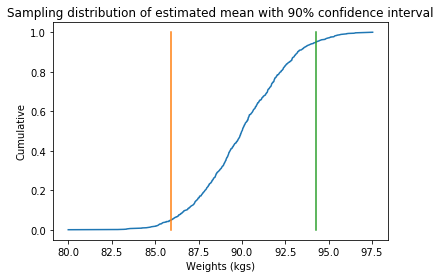

In [76]:
# at 95% confidence interval two-tailed
wgt_5 = percentile(0.05,x)
wgt_95 = percentile(0.95,x)

plt.plot(x,y)
plt.title('Sampling distribution of estimated mean with 90% confidence interval')
plt.xlabel('Weights (kgs)')
plt.ylabel('Cumulative')
plt.plot([wgt_5,wgt_5],[0,1])
plt.plot([wgt_95,wgt_95],[0,1])

In [77]:
np.mean(sample_means)

90.04049120048559

The sampling distribution answers a different question: it gives you a
sense of how reliable an estimate is by telling you how much it would
vary if you ran the experiment again

8.4 Sampling Bias
------

It is important to remember that confidence intervals and standard errors
only quantify sampling error; that is, error due to measuring only part of the
population. The sampling distribution does not account for other sources of
error, notably sampling bias and measurement error.

When you report an estimated quantity, it is useful to report standard error,
or a confidence interval, or both, in order to quantify sampling error. But
it is also important to remember that sampling error is only one source of
error, and often it is not the biggest

8.5 Exponential Estimation
----

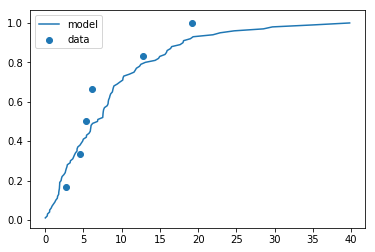

In [105]:
sample2 = [5.384, 4.493, 19.198, 2.790, 6.122, 12.844]
model = np.random.exponential(scale=np.mean(sample2),size=100)

x,y=compute_cdf(sample2)
x1,y1 = compute_cdf(model)
plt.scatter(x,y,label='data')
plt.plot(x1,y1,label='model')
plt.legend()

What do you think is the parameter, λ, of this distribution?

In general, the mean of an exponential distribution is 1/λ, so working backwards, we might choose
L = 1/mean.
 
median for exponential distribution: 
Lm = ln(2)/m

numpy.random.exponential(scale,size)

scale : float or array_like of floats

The scale parameter, beta = 1/lambda.

In [138]:
def estimate_exp(series,iterations):
    mean = np.mean(series)
    lam = 1/mean
    
    lambda_estimate  = []
    median_estimate = []
    
    for _ in range(iterations):
        sample = np.random.exponential(scale=mean,size=len(series))
        L = 1/np.mean(sample)
        Lm = np.log(2)/L
        
        lambda_estimate.append(L)
        median_estimate.append(Lm)
    
    return lambda_estimate,median_estimate

In [139]:
lamda_estimate,median_estimate = estimate_exp(sample2,iterations=1000)
Lm = np.mean(sample2)*np.log(2)
       
print('Mean RMSE: ',RMSE(lamda_estimate,1/np.mean(sample2)),' | Median RMSE: ',RMSE(median_estimate,Lm))

Mean RMSE:  0.07566833929908676  | Median RMSE:  2.4010565550293075


In [145]:
def estimate_exp(series,iterations):
    mean = np.mean(series)

    mean_estimates  = []
    median_estimate = []
    
    for _ in range(iterations):
        sample = np.random.exponential(scale=mean,size=len(series))
        sample_mean = np.mean(sample)
        mean_estimates.append(sample_mean)
    
    return mean_estimates

sample_means = estimate_exp(sample2,1000)
RMSE(sample_means,np.mean(sample2))

3.436976478765753